# British Airways

---

## Web scraping and analysis


### Scraping data from Skytrax


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"


    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | I flew internationally for the...
1,"✅ Trip Verified | BA, after subsequent delays ..."
2,Not Verified | It is embarrassing to have th...
3,✅ Trip Verified | Flight cancelled due to bad ...
4,✅ Trip Verified | British Airways oversold my...


In [ ]:
df.to_csv("data/BA_reviews.csv")

In [ ]:
df["reviews"] = df["reviews"].str.replace("✅ Trip Verified", "", regex=False)

In [ ]:
df["reviews"] = df["reviews"].str.replace("Not Verified", "", regex=False)

In [ ]:
print(df.head())

                                             reviews
0   |  I flew internationally for the first time ...
1   | BA, after subsequent delays and postponed d...
2   |   It is embarrassing to have the word “Brit...
3   | Flight cancelled due to bad weather, BA con...
4   |  British Airways oversold my LHR to LAX fli...


In [ ]:
df.to_csv("data/BA_reviews_cleaned.csv", index=False)

**3.1 Sentiment Analysis**

In [ ]:
from textblob import TextBlob
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity
df["sentiment"] = df["reviews"].apply(get_sentiment)
df.to_csv("data/BA_reviews_sentiment.csv", index=False)
print(df.head())


                                             reviews  sentiment
0   |  I flew internationally for the first time ...  -0.022431
1   | BA, after subsequent delays and postponed d...   0.008514
2   |   It is embarrassing to have the word “Brit...   0.059091
3   | Flight cancelled due to bad weather, BA con...  -0.045000
4   |  British Airways oversold my LHR to LAX fli...   0.097210


**3.2 Word Cloud**

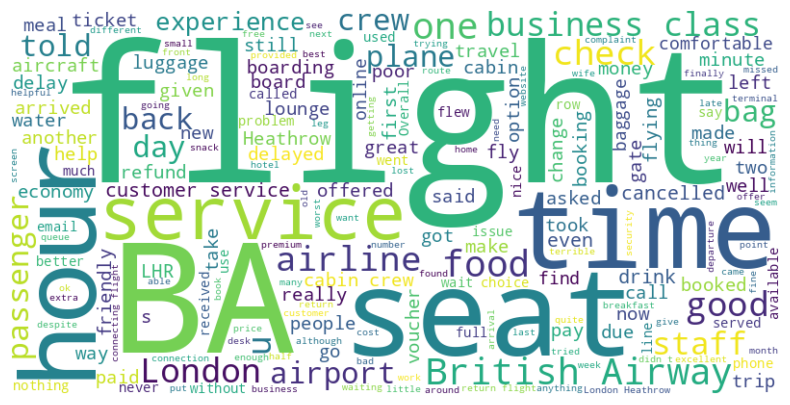

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
all_reviews = " ".join(review for review in df.reviews)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
pip install python-pptx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.4/472.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 6.3 MB/s eta 0:00:00


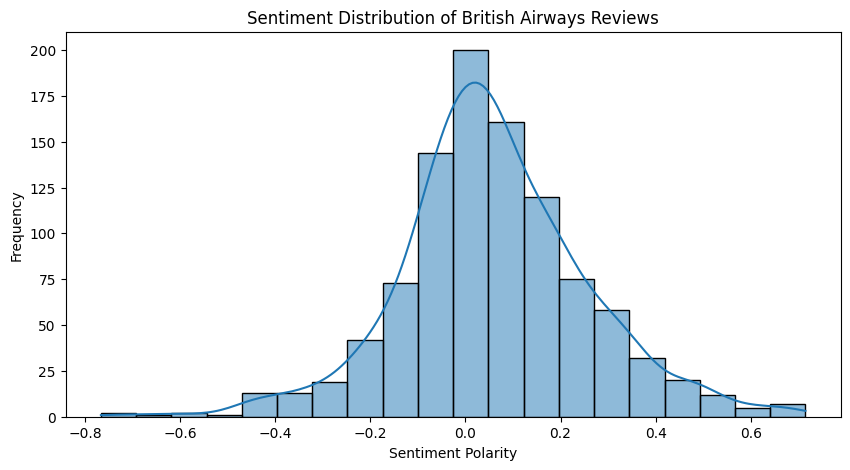

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pptx import Presentation
from pptx.util import Inches
plt.figure(figsize=(10, 5))
sns.histplot(df["sentiment"], bins=20, kde=True)
plt.title("Sentiment Distribution of British Airways Reviews")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.savefig("data/sentiment_distribution.png")
plt.show()
wordcloud.to_file("data/wordcloud.png")


In [ ]:
ppt = Presentation("/content/Presentation Template - Task 1.pptx")
slide_layout = ppt.slide_layouts[1]
slide = ppt.slides.add_slide(slide_layout)
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "British Airways Reviews Analysis"
content.text = """
Key Findings:
1. The sentiment distribution shows a mix of positive and negative reviews.
2. Commonly mentioned words in reviews highlight customer service and flight experience.
3. Further analysis can include topic modeling for deeper insights.
"""

left = Inches(1)
top = Inches(2)
height = Inches(3.5)

pic = slide.shapes.add_picture("data/sentiment_distribution.png", left, top, height=height)

left = Inches(5)
pic = slide.shapes.add_picture("data/wordcloud.png", left, top, height=height)

ppt.save("data/British_Airways_Review_Analysis.pptx")
